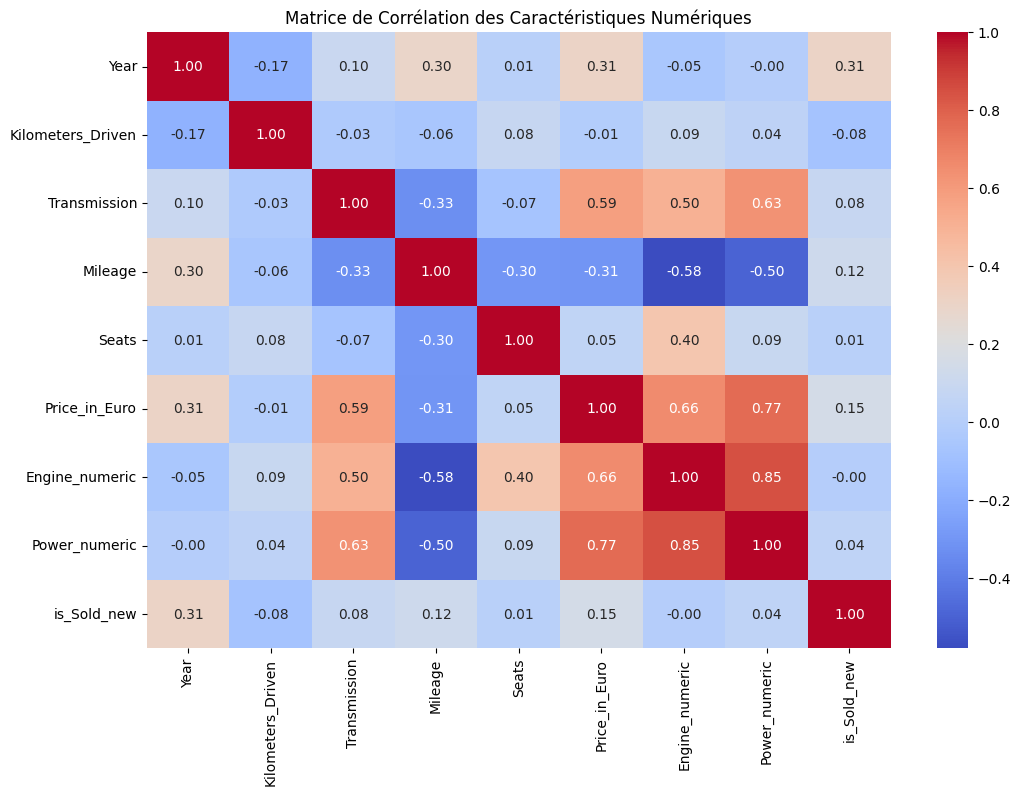

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Charger le fichier CSV
file_path = 'Classeur1.csv'
data = pd.read_csv(file_path, sep=';')

# Calcul de la matrice de corrélation pour les colonnes numériques
corr_matrix = data.select_dtypes(include=['float64', 'int64']).corr()

# Affichage de la matrice de corrélation avec Seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de Corrélation des Caractéristiques Numériques")
plt.show()


In [2]:
# Remplacer les valeurs manquantes dans 'Seats' par la médiane
data['Seats'].fillna(data['Seats'].median(), inplace=True)

# Vérifier s'il reste des valeurs manquantes
print(data.isnull().sum())


Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Seats                0
Price_in_Euro        0
Brand                0
Model                0
Engine_numeric       0
Power_numeric        0
is_Sold_new          0
dtype: int64


C:\Users\zaebo\AppData\Local\Temp\ipykernel_26404\1124106359.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Seats'].fillna(data['Seats'].median(), inplace=True)


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sélection des colonnes numériques pour l'analyse
num_columns = ['Year', 'Kilometers_Driven', 'Mileage', 'Seats', 'Engine_numeric', 'Power_numeric', 'Price_in_Euro']

# Calcul de l'IQR et identification des valeurs aberrantes pour chaque colonne numérique
for column in num_columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    print(f"{column} : {len(outliers)} valeurs aberrantes détectées")

    # Optionnel : Supprimer les valeurs aberrantes ici si nécessaire
    # data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]


Year : 46 valeurs aberrantes détectées
Kilometers_Driven : 201 valeurs aberrantes détectées
Mileage : 105 valeurs aberrantes détectées
Seats : 962 valeurs aberrantes détectées
Engine_numeric : 61 valeurs aberrantes détectées
Power_numeric : 264 valeurs aberrantes détectées
Price_in_Euro : 716 valeurs aberrantes détectées
